# Spotify Data Project.
#### by Ali Mert İnhan for CS210, January 2024, Sabancı University

# Read all the data
* Read all datasets that'll be used and display the first 5 rows

In [1]:
import json
import pandas as pd 
from matplotlib import pyplot as plt

In [2]:
marquee=pd.read_json("Marquee.json")
marquee.head()

artistName                      segment
0  Kahraman Deniz  Previously Active Listeners
1            Daya              Light listeners
2          GRiNGO              Light listeners
3        Doja Cat  Previously Active Listeners
4       Emy Perez              Light listeners

In [3]:
squeries=pd.read_json("SearchQueries.json")
squeries.head()

platform                     searchTime searchQuery  \
0        IPHONE  2023-10-09T21:21:24.863Z[UTC]    kibariye   
1        IPHONE  2023-10-12T02:06:45.412Z[UTC]         uzi   
2        IPHONE  2023-10-12T02:55:52.673Z[UTC]         uzi   
3        IPHONE  2023-10-12T11:12:12.143Z[UTC]         uzi   
4  IPHONE_ARM64  2023-10-17T15:39:11.750Z[UTC]           ş   

                               searchInteractionURIs  
0  [spotify:track:6UX8nGE5sT7FsUAgQILD6X, spotify...  
1            [spotify:artist:51DevdOxIJin6DB1FXJpD1]  
2                                                 []  
3                                                 []  
4                                                 []

In [4]:
library=pd.read_json("YourLibrary.json")
library.head()

artist                        album            track  \
0  Tuğba Yurt              İnceden İnceden  İnceden İnceden   
1       Badem                        Badem   Kara Değil mi?   
2     Hümeyra                      Hümeyra         Kördüğüm   
3        GIMS  Subliminal (La face cachée)            Bella   
4     Rihanna                         Loud         Man Down   

                                    uri  
0  spotify:track:2QD387ZxhUxTJQYLe11w9D  
1  spotify:track:37FLmQ6Fp0wPXthYqcrHQh  
2  spotify:track:7wsTk17VHWZ2s5g3XpZvIj  
3  spotify:track:1vELwZM3uBYWd8HrtddD4l  
4  spotify:track:1Bx0zEdVjkFlV27iKaePug

In [5]:
hist0 = pd.read_json("StreamingHistory0.json")
hist0.head()

endTime  artistName             trackName  msPlayed
0  2022-11-20 19:04         UZI             ARASAN DA     74660
1  2023-01-04 21:02  Dedublüman                 Belki     73991
2  2023-01-05 07:56  Can Bonomo  Yine Karşılaşırsak      8800
3  2023-01-05 07:56  Funda Arar           Yediverenim      1021
4  2023-01-05 08:08      Ati242                    25     23730

In [6]:
hist1 = pd.read_json("StreamingHistory1.json")
hist1.head()

endTime    artistName        trackName  msPlayed
0  2023-09-08 16:50       kobzx2z     TOUT VA BIEN       896
1  2023-09-08 16:50        Heijan  Değilim Bi Aşık      2090
2  2023-09-08 16:50     Sibel Can          Padişah      1066
3  2023-09-08 16:50   Yusuf Güney  Unut Onu Kalbim      1237
4  2023-09-08 16:50  Mehmet Elmas   Canın Sağolsun      1088

# Explore Listening Habits Over Time
* Concatenate the streaming history data (hist0, hist1) into one DataFrame.
* Convert the 'endTime' column to datetime format.
* Analyze trends in your music taste and playlist creation over time.
* Print streaming_history.info() to check if it's done correctly
  

In [7]:
streaming_history = pd.concat([hist0, hist1], ignore_index=True)
streaming_history['endTime'] = pd.to_datetime(streaming_history['endTime'])
streaming_history.head()

endTime  artistName             trackName  msPlayed
0 2022-11-20 19:04:00         UZI             ARASAN DA     74660
1 2023-01-04 21:02:00  Dedublüman                 Belki     73991
2 2023-01-05 07:56:00  Can Bonomo  Yine Karşılaşırsak      8800
3 2023-01-05 07:56:00  Funda Arar           Yediverenim      1021
4 2023-01-05 08:08:00      Ati242                    25     23730

In [8]:
streaming_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14583 entries, 0 to 14582
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   endTime     14583 non-null  datetime64[ns]
 1   artistName  14583 non-null  object        
 2   trackName   14583 non-null  object        
 3   msPlayed    14583 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 455.8+ KB


In [9]:
plt.style.use('dark_background')

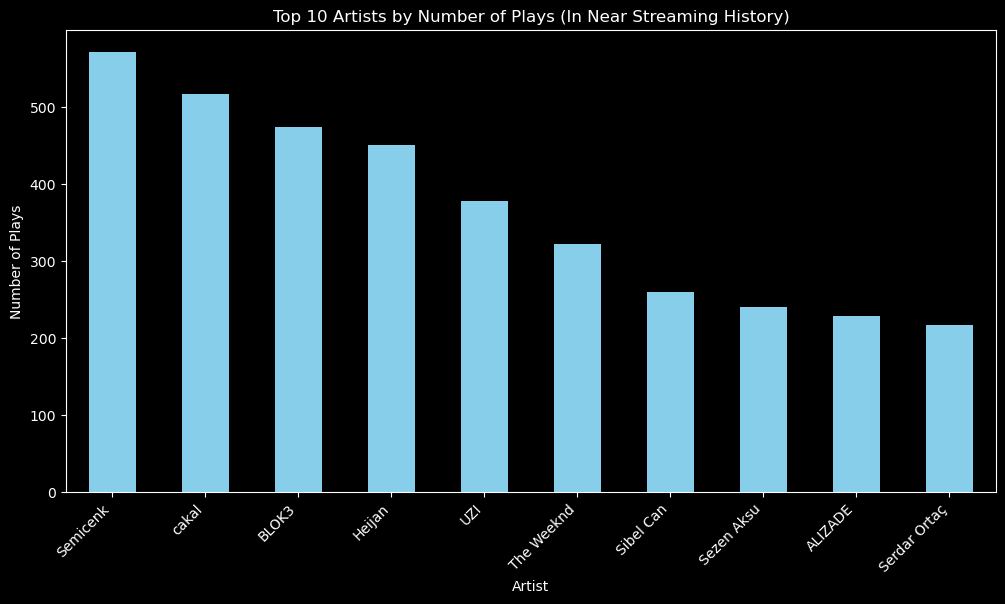

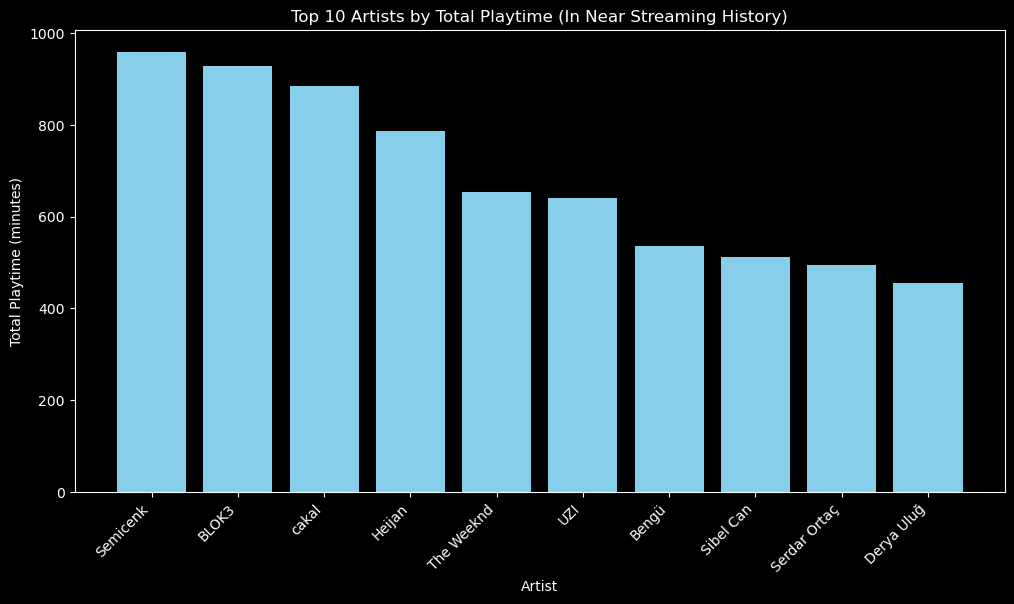

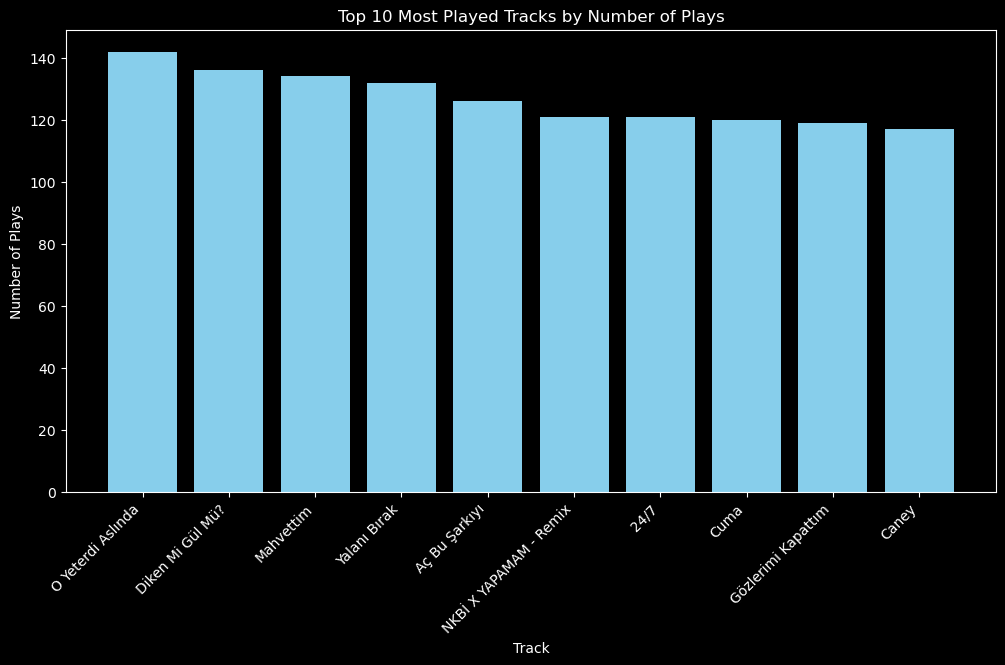

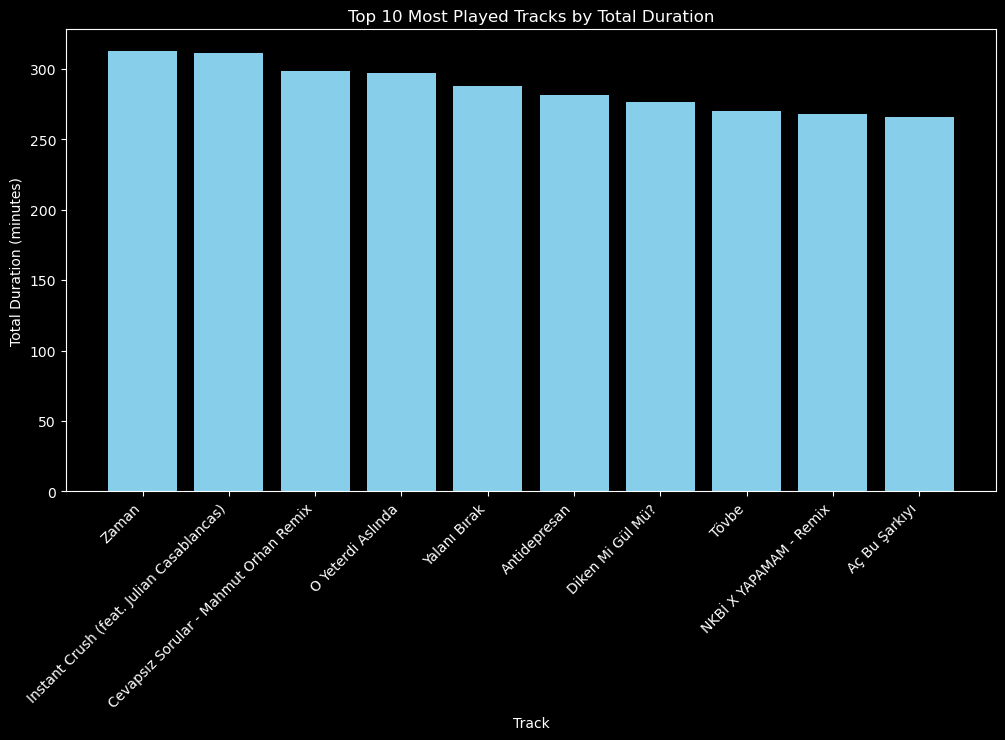

In [10]:
# Plot the most played artists by the number of plays
plt.figure(figsize=(12, 6))
top_artists_over_time = streaming_history.groupby('artistName').size().nlargest(10)
top_artists_over_time.plot(kind='bar', xlabel='Artist', ylabel='Number of Plays', title='Top 10 Artists by Number of Plays (In Near Streaming History)',color="skyblue")
plt.xticks(rotation=45, ha='right')
plt.savefig('top_artists_play_numbers.png', bbox_inches='tight')
plt.show()


# Plot the most played artists by total playtime
artist_playtime = streaming_history.groupby('artistName')['msPlayed'].sum().reset_index()
artist_playtime_sorted = artist_playtime.sort_values(by='msPlayed', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(artist_playtime_sorted['artistName'][:10], artist_playtime_sorted['msPlayed'][:10] / (1000 * 60), color='skyblue')
plt.title('Top 10 Artists by Total Playtime (In Near Streaming History)')
plt.xlabel('Artist')
plt.ylabel('Total Playtime (minutes)')
plt.xticks(rotation=45, ha='right')
plt.savefig('top_artists_playtime.png', bbox_inches='tight')
plt.show()

# Plot the most played tracks by the number of plays
track_stats = streaming_history.groupby(['artistName', 'trackName']).agg(
    num_plays=('msPlayed', 'count'),
    total_duration=('msPlayed', 'sum')
).reset_index()

track_stats_by_plays = track_stats.sort_values(by='num_plays', ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.bar(track_stats_by_plays['trackName'], track_stats_by_plays['num_plays'], color='skyblue')
plt.title('Top 10 Most Played Tracks by Number of Plays')
plt.xlabel('Track')
plt.ylabel('Number of Plays')
plt.xticks(rotation=45, ha='right')

plt.savefig('top_tracks_by_plays.png', bbox_inches='tight')
plt.show()

# Plot the most played tracks by total duration
track_stats_by_duration = track_stats.sort_values(by='total_duration', ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.bar(track_stats_by_duration['trackName'], track_stats_by_duration['total_duration'] / (1000 * 60), color='skyblue')
plt.title('Top 10 Most Played Tracks by Total Duration')
plt.xlabel('Track')
plt.ylabel('Total Duration (minutes)')
plt.xticks(rotation=45, ha='right')

plt.savefig('top_tracks_by_duration.png', bbox_inches='tight')
plt.show()

In [11]:
library.head()

artist                        album            track  \
0  Tuğba Yurt              İnceden İnceden  İnceden İnceden   
1       Badem                        Badem   Kara Değil mi?   
2     Hümeyra                      Hümeyra         Kördüğüm   
3        GIMS  Subliminal (La face cachée)            Bella   
4     Rihanna                         Loud         Man Down   

                                    uri  
0  spotify:track:2QD387ZxhUxTJQYLe11w9D  
1  spotify:track:37FLmQ6Fp0wPXthYqcrHQh  
2  spotify:track:7wsTk17VHWZ2s5g3XpZvIj  
3  spotify:track:1vELwZM3uBYWd8HrtddD4l  
4  spotify:track:1Bx0zEdVjkFlV27iKaePug

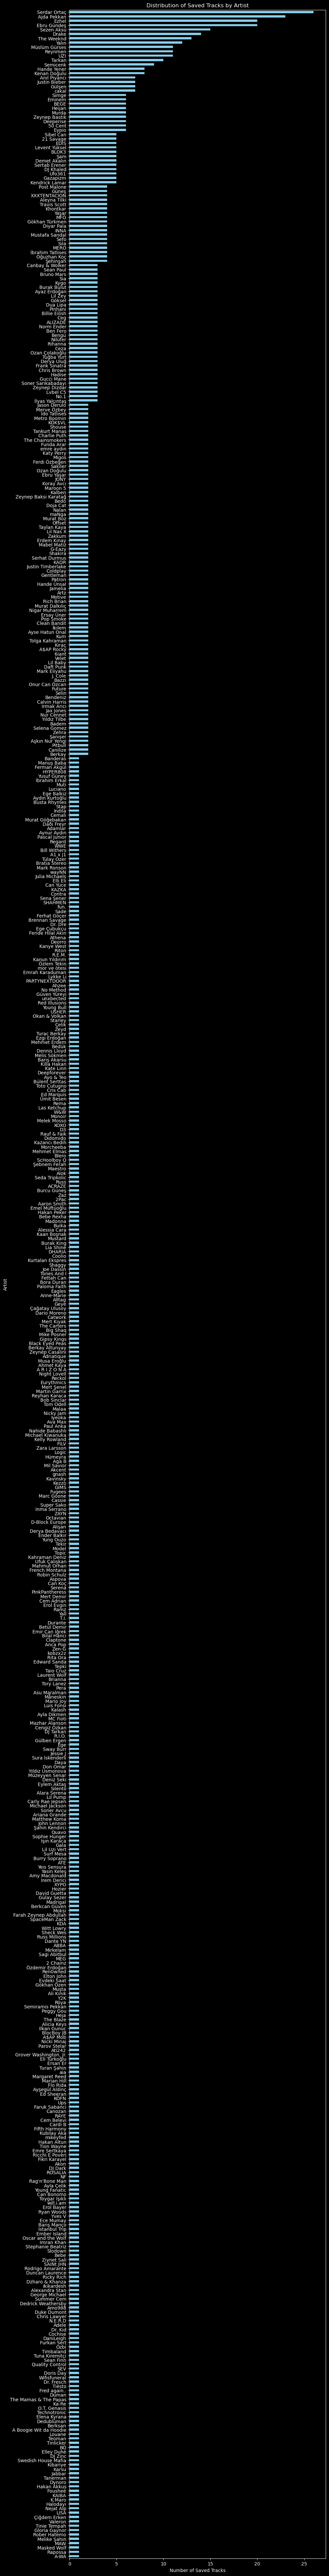

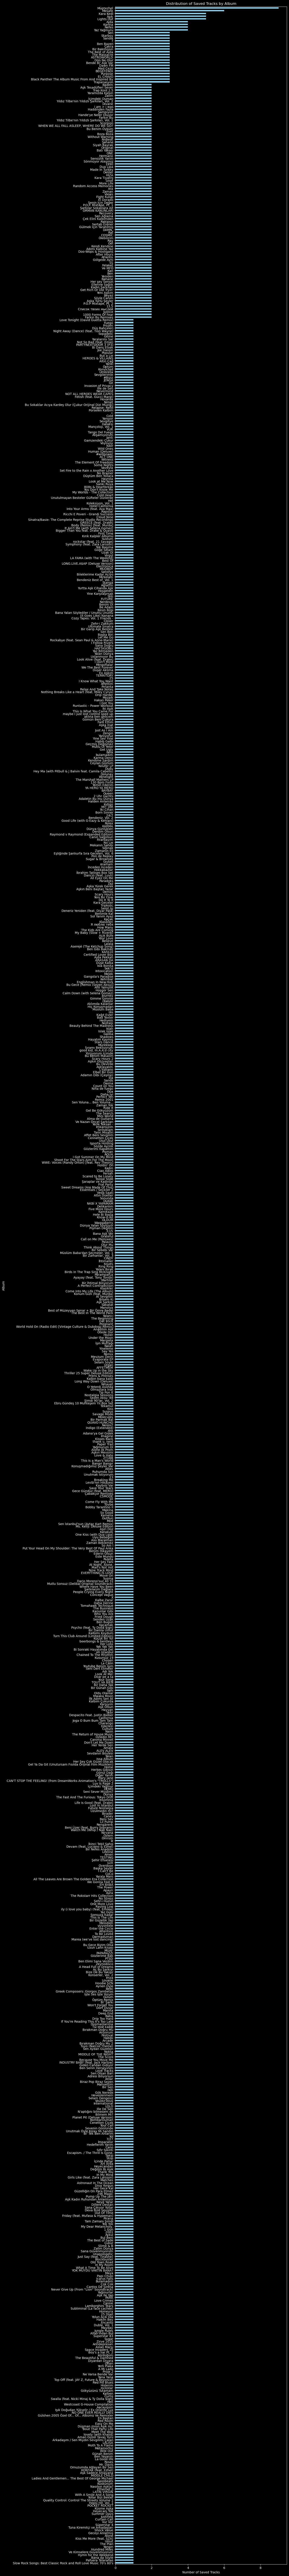

In [12]:
# Plot the distribution of saved tracks by artist
plt.figure(figsize=(10, 100))
library['artist'].value_counts().sort_values().plot(kind='barh', color='skyblue')
plt.title('Distribution of Saved Tracks by Artist')
plt.xlabel('Number of Saved Tracks')
plt.ylabel('Artist')
plt.savefig('tracks_by_artists.png', bbox_inches='tight')
plt.show()

# Plot the distribution of saved tracks by album
plt.figure(figsize=(10, 150))
library['album'].value_counts().sort_values().plot(kind='barh', color='skyblue')
plt.title('Distribution of Saved Tracks by Album')
plt.xlabel('Number of Saved Tracks')
plt.ylabel('Album')
plt.savefig('tracks_by_album.png', bbox_inches='tight')
plt.show()

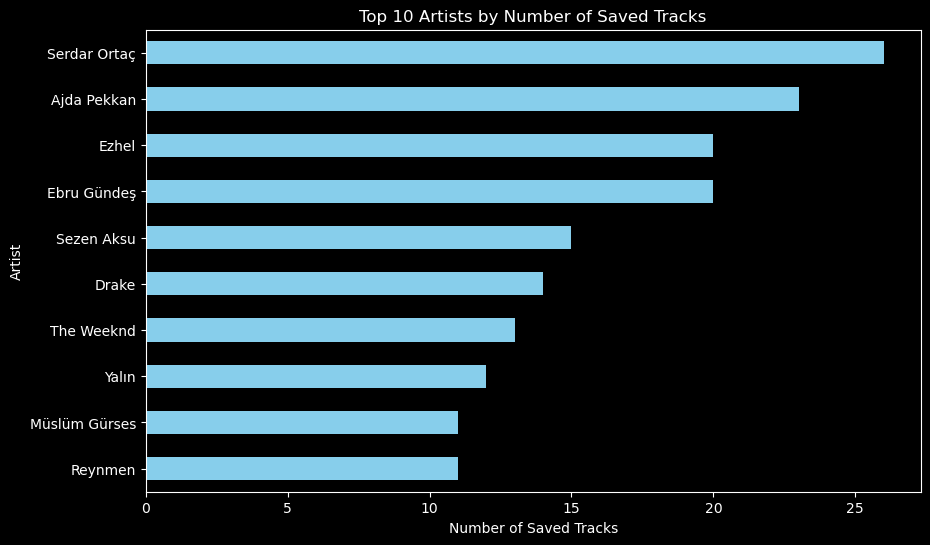

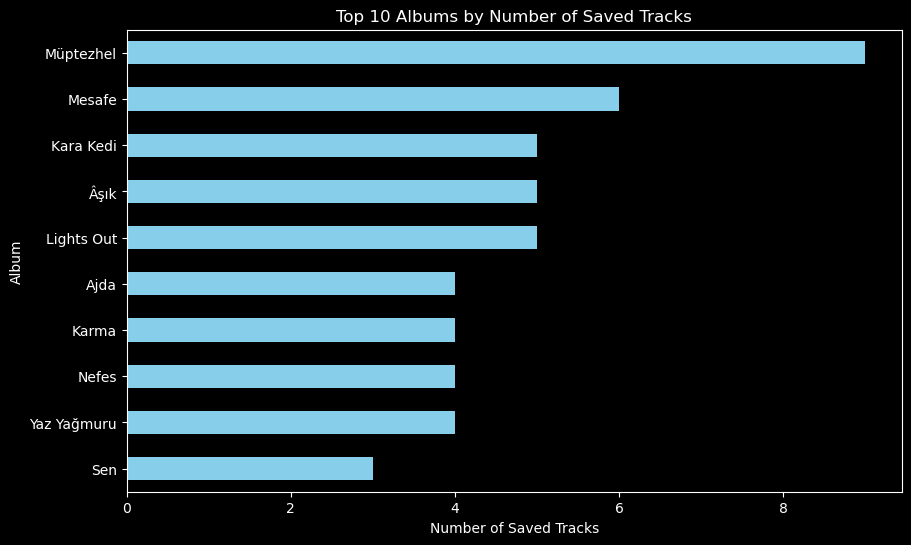

In [13]:
# Plot the distribution of saved tracks by artist (top 10)
plt.figure(figsize=(10, 6))
library['artist'].value_counts().sort_values().tail(10).plot(kind='barh', color='skyblue')
plt.title('Top 10 Artists by Number of Saved Tracks')
plt.xlabel('Number of Saved Tracks')
plt.ylabel('Artist')
plt.savefig('top_artists.png', bbox_inches='tight')
plt.show()

# Plot the distribution of saved tracks by album (top 10)
plt.figure(figsize=(10, 6))
library['album'].value_counts().sort_values().tail(10).plot(kind='barh', color='skyblue')
plt.title('Top 10 Albums by Number of Saved Tracks')
plt.xlabel('Number of Saved Tracks')
plt.ylabel('Album')
plt.savefig('top_albums.png', bbox_inches='tight')
plt.show()

# Visualizing Listener Segments

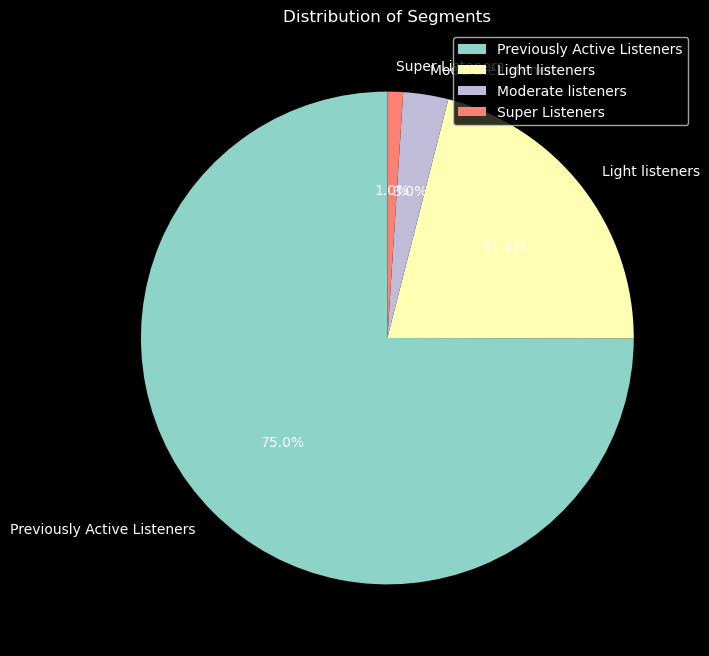

In [14]:
plt.figure(figsize=(8, 8))
plt.pie( marquee['segment'].value_counts(), labels= marquee['segment'].value_counts().index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Segments')
plt.savefig('segments_pie_chart.png', bbox_inches='tight')
plt.legend()
plt.show()

It appears that a significant chunk, roughly 75%, of the artists in my collection fall under the 'Previously Active' listener segment. This might mean that I tend to abandon artists after I am done with them. 

Around 20% of the artists fall into the 'Light Listener' category, and for only 1% of the artists I listen to, I am a "Super Listener". This shows I don't obsessively listen to artists, I quite like variety and tend to get bored with the artists

# Visaulizing Search Queries

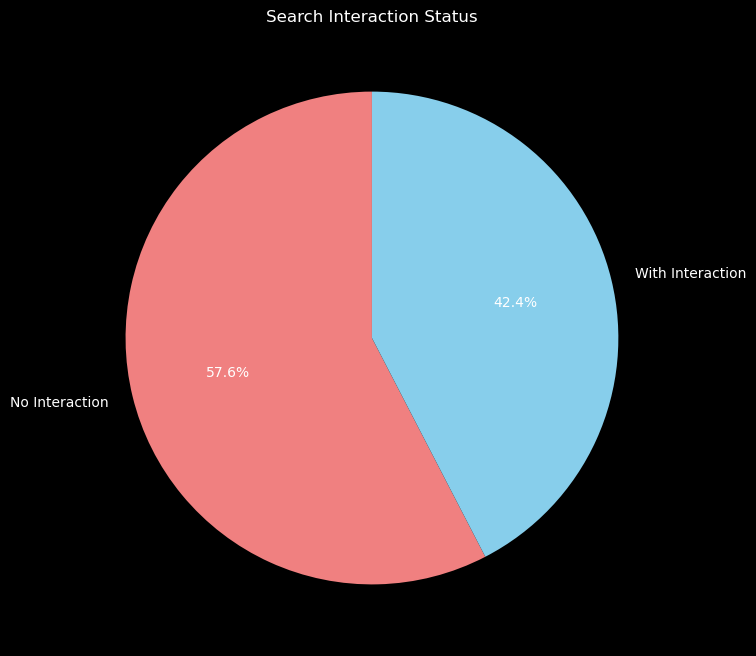

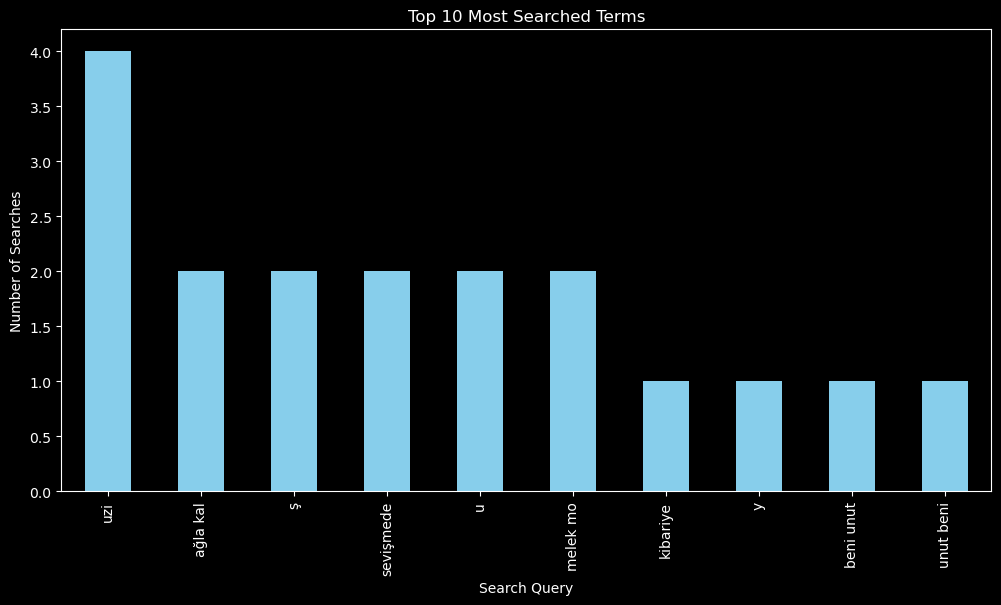

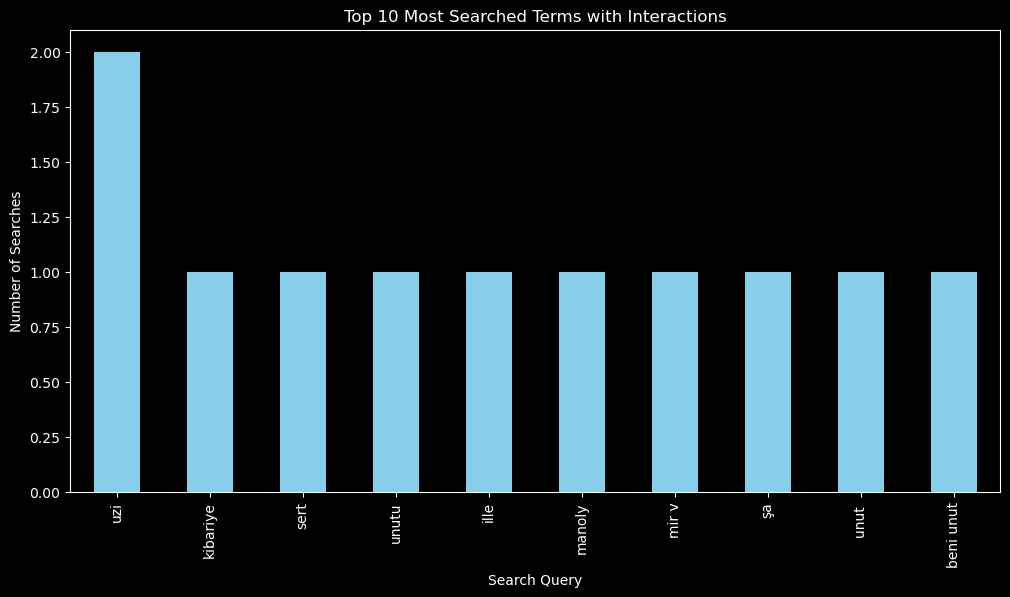

In [15]:
# Check if there is interaction for each search
squeries['has_interaction'] = squeries['searchInteractionURIs'].apply(lambda x: len(x) > 0)

# Count the occurrences of interaction
interaction_counts = squeries['has_interaction'].value_counts()

# Visualize interaction status in a pie chart
plt.figure(figsize=(8, 8))
plt.pie(interaction_counts, labels=['No Interaction', 'With Interaction'], autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'skyblue'])
plt.title('Search Interaction Status')
plt.savefig('search_interaction_pie_chart.png', bbox_inches='tight')
plt.show()

# Visualize most searched terms in a bar plot
plt.figure(figsize=(12, 6))
top_search_terms = squeries['searchQuery'].value_counts().head(10)
top_search_terms.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Searched Terms')
plt.xlabel('Search Query')
plt.ylabel('Number of Searches')
plt.savefig('top_search_terms_bar_plot.png', bbox_inches='tight')
plt.show()

squeries_with_interaction = squeries[squeries['searchInteractionURIs'].apply(lambda x: len(x) > 0)]
plt.figure(figsize=(12, 6))
top_search_terms_with_interaction = squeries_with_interaction['searchQuery'].value_counts().head(10)
top_search_terms_with_interaction.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Searched Terms with Interactions')
plt.xlabel('Search Query')
plt.ylabel('Number of Searches')
plt.savefig('top_search_terms_with_interaction_bar_plot.png', bbox_inches='tight')
plt.show()

Here we can see, most of my spotify searches **do not* end up with an interaction. Though there is a good enough percentage (40%). I think it's fair to say spotify search algorithm is satisfying my needs just.. "**meh**"  

# Visualize Listening Times (Night Owl or Early Bird?)

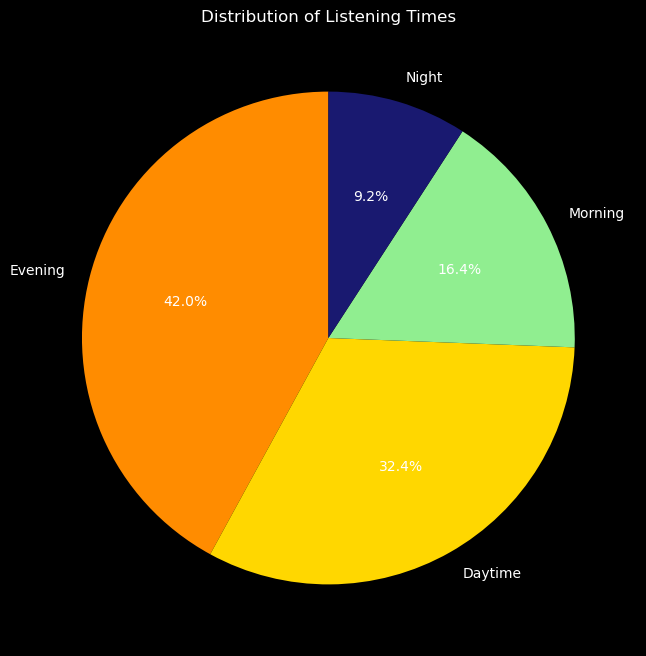

In [16]:
streaming_history['hour'] = streaming_history['endTime'].dt.hour

def categorize_time(hour):
    if 0 <= hour < 6:
        return 'Night'
    elif 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Daytime'
    else:
        return 'Evening'

streaming_history['time_period'] = streaming_history['hour'].apply(categorize_time)

listening_times = streaming_history['time_period'].value_counts()

plt.figure(figsize=(8, 8))
listening_times.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['darkorange',  'gold','lightgreen','midnightblue'])
plt.title('Distribution of Listening Times')
plt.ylabel('') 
plt.savefig('listening_times_pie_chart.png', bbox_inches='tight')
plt.show()

According to this pie chart, I think I might be classified as a "Dinner Person" if we look at the data as a whole. 

When we compare the early morning to night though, it's clear I like to listen to music more in the mornings.

In [17]:
streaming_history.head()

endTime  artistName             trackName  msPlayed  hour  \
0 2022-11-20 19:04:00         UZI             ARASAN DA     74660    19   
1 2023-01-04 21:02:00  Dedublüman                 Belki     73991    21   
2 2023-01-05 07:56:00  Can Bonomo  Yine Karşılaşırsak      8800     7   
3 2023-01-05 07:56:00  Funda Arar           Yediverenim      1021     7   
4 2023-01-05 08:08:00      Ati242                    25     23730     8   

  time_period  
0     Evening  
1     Evening  
2     Morning  
3     Morning  
4     Morning

# Add Listener Segment Column to streaming_history dataframe and Plot the Distribution of Listening Times by Listener Segment

In [18]:
streaming_history = pd.merge(streaming_history, marquee, how='left', on='artistName')


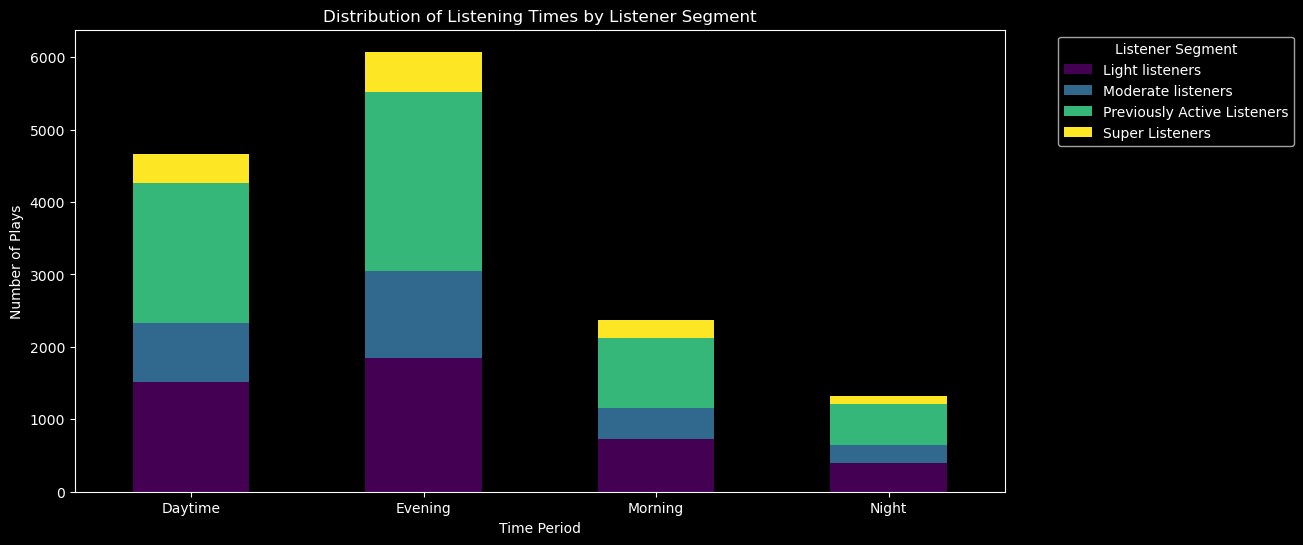

In [19]:
# Group by time period and marquee segment, count the number of plays
listening_times = streaming_history.groupby(['time_period', 'segment']).size().unstack(fill_value=0)

listening_times.plot(kind='bar', stacked=True, colormap='viridis', figsize=(12, 6))
plt.title('Distribution of Listening Times by Listener Segment')
plt.xlabel('Time Period')
plt.ylabel('Number of Plays')
plt.xticks(rotation=0)
plt.legend(title='Listener Segment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('listening_times_by_segment_bar_plot.png', bbox_inches='tight')
plt.show()

It seems I mostly like to listen to my favorite artist in in the evening. Even when you proportionally compare, I listen to artists I like the most mostly in the evening. While I listen to the artists I "lightly listen" proportionally more in daytime.

And at night, I don't seem to like putting on songs of my favorite musicians.

In [20]:
streaming_history.head()

endTime  artistName             trackName  msPlayed  hour  \
0 2022-11-20 19:04:00         UZI             ARASAN DA     74660    19   
1 2023-01-04 21:02:00  Dedublüman                 Belki     73991    21   
2 2023-01-05 07:56:00  Can Bonomo  Yine Karşılaşırsak      8800     7   
3 2023-01-05 07:56:00  Funda Arar           Yediverenim      1021     7   
4 2023-01-05 08:08:00      Ati242                    25     23730     8   

  time_period                      segment  
0     Evening              Light listeners  
1     Evening  Previously Active Listeners  
2     Morning  Previously Active Listeners  
3     Morning  Previously Active Listeners  
4     Morning  Previously Active Listeners

# Create a Support Vector Machine Model that predicts Listener Segment

In [22]:
streaming_history.dropna(inplace=True)
streaming_history.reset_index(drop=True, inplace=True)
#Map
time_period_mapping = {'Night': 1, 'Morning': 2, 'Daytime': 3, 'Evening': 4}
streaming_history['time_period'] = streaming_history['time_period'].map(time_period_mapping)
segment_mapping = {'Light listeners': 1, 'Previously Active Listeners': 2, 'Moderate listeners': 3, 'Super Listeners': 4}
streaming_history['segment'] = streaming_history['segment'].map(segment_mapping)

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

X = streaming_history[['msPlayed', 'hour', 'time_period']]
y = streaming_history['segment']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1999)
model = SVC(random_state=1999)
model.fit(X_train, y_train)
y_pred_svm = model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(accuracy_svm)

0.41897506925207756


<Figure size 800x600 with 0 Axes>

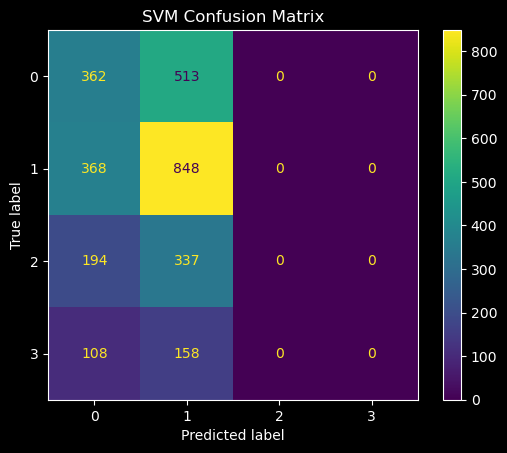

In [53]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

disp = ConfusionMatrixDisplay(conf_matrix_svm)
plt.figure(figsize=(8, 6))
disp.plot(cmap="viridis")
plt.title('SVM Confusion Matrix')
plt.show();

# Create and train a Decision Tree Classifier

In [48]:
from sklearn.tree import DecisionTreeClassifier
model_decision_tree = DecisionTreeClassifier(random_state=1999)
model_decision_tree.fit(X_train, y_train)
y_pred_decision_tree = model_decision_tree.predict(X_test)

accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
print(accuracy_decision_tree)

0.5384349030470914


<Figure size 800x600 with 0 Axes>

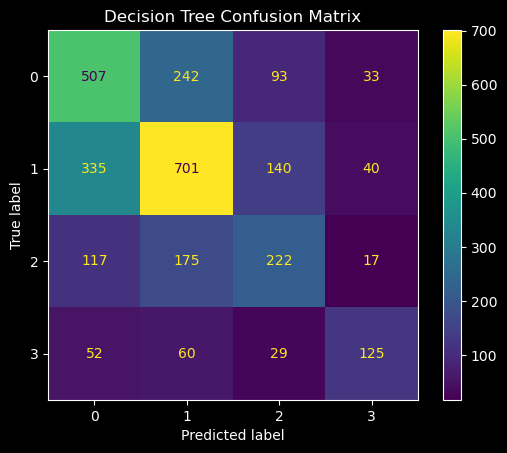

In [47]:
conf_matrix_decision_tree = confusion_matrix(y_test, y_pred_decision_tree)
disp = ConfusionMatrixDisplay(conf_matrix_decision_tree)
plt.figure(figsize=(8, 6))
disp.plot(cmap="viridis")
plt.title('Decision Tree Confusion Matrix')
plt.show();

# Create and Train Gradient Boosting Classifier Model


0.6063019390581718


<Figure size 800x600 with 0 Axes>

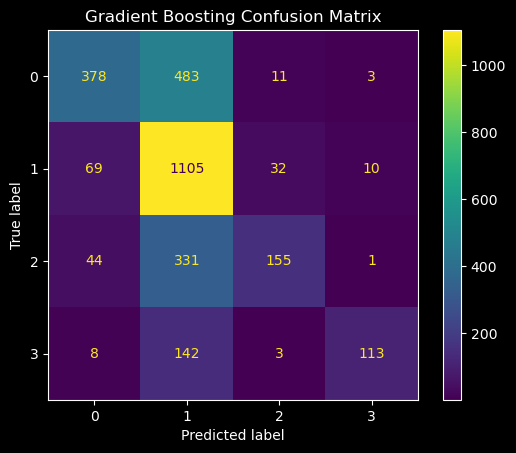

In [55]:
from sklearn.ensemble import GradientBoostingClassifier

model_gradient_boosting = GradientBoostingClassifier(random_state=1999)
model_gradient_boosting.fit(X_train, y_train)
y_pred_gradient_boosting = model_gradient_boosting.predict(X_test)

accuracy_gradient_boosting = accuracy_score(y_test, y_pred_gradient_boosting)
print(accuracy_gradient_boosting)
conf_matrix_gradient_boosting = confusion_matrix(y_test, y_pred_gradient_boosting)
disp_gradient_boosting = ConfusionMatrixDisplay(conf_matrix_gradient_boosting)
plt.figure(figsize=(8, 6))
disp_gradient_boosting.plot(cmap="viridis")
plt.title('Gradient Boosting Confusion Matrix')
plt.show()


{'subsample': 0.8, 'n_estimators': 150, 'max_depth': 4, 'learning_rate': 0.1}
Accuracy:  0.6087257617728532


<Figure size 800x600 with 0 Axes>

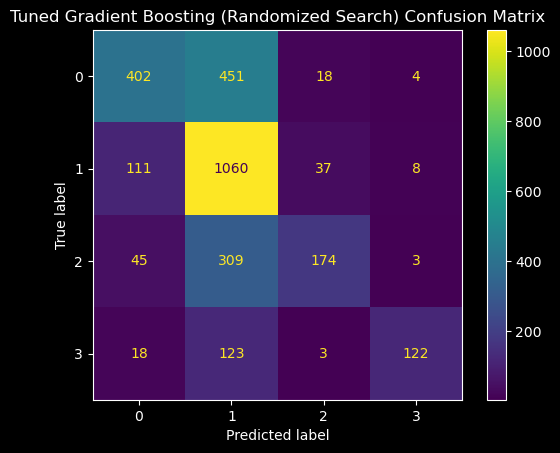

In [57]:
from sklearn.model_selection import RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.7, 0.8, 0.9, 1.0]
}

random_search_gradient_boosting = RandomizedSearchCV(
    model_gradient_boosting,
    param_distributions=param_dist,
    n_iter=10, 
    cv=5,
    scoring='accuracy',
    random_state=1999
)

random_search_gradient_boosting.fit(X_train, y_train)

best_params_random = random_search_gradient_boosting.best_params_
print(best_params_random)

y_pred_gradient_boosting_random = random_search_gradient_boosting.predict(X_test)
accuracy_gradient_boosting_random = accuracy_score(y_test, y_pred_gradient_boosting_random)
print('Accuracy: ',accuracy_gradient_boosting_random)

conf_matrix_gradient_boosting_random = confusion_matrix(y_test, y_pred_gradient_boosting_random)
disp_gradient_boosting_random = ConfusionMatrixDisplay(conf_matrix_gradient_boosting_random)
plt.figure(figsize=(8, 6))
disp_gradient_boosting_random.plot(cmap="viridis")
plt.title('Tuned Gradient Boosting (Randomized Search) Confusion Matrix')
plt.show()

# Discussion

## What can be made even better?

I suppose my final model could've been better, but nevertheless, there is always room for imporevement and I am open to develop it in the future.